In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import sklearn as skl
import seaborn as sns
import config
from sqlalchemy import create_engine



In [2]:
#set up SQL connection

protocol = 'postgresql'
username = config.username
password = config.password
host = 'localhost'
port = 5432
database_name = config.database_name
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
con = engine.connect()

In [3]:
#read in cleaned X table from SQL

cleaned_placeholder_df = pd.read_sql('Select * from "X"',con)
cleaned_placeholder_df.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Rating Agency Name_Standard & Poor's Ratings Services,Sector_Basic Industries,Sector_Capital Goods,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Health Care,Sector_Other,Sector_Public Utilities,Sector_Technology
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,0,0,0,0,0,0,0,1,0,0
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,0,0,0,0,0,0,0,1,0,0
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,0,0,0,0,0,0,0,1,0,0
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,0,0,0,0,0,0,0,1,0,0
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,1,0,0,0,0,0,0,1,0,0


In [5]:
#read in cleaned Y table from SQL alternate_y.csv.
cleaned_y_df = pd.read_sql("Select * from alternate_y",con)
cleaned_y_df.head()

,Rating
0,1
1,0
2,0
3,0
4,0


In [18]:
# Split our preprocessed data into our features and target arrays
y = cleaned_y_df['Rating'].values
y

# declare x variable
X = cleaned_placeholder_df.values
X

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 48)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_layer = len(X_train_scaled[0])
hidden_nodes_L1= 120
hidden_nodes_L2 = 80
hidden_nodes_L3 = 50
hidden_nodes_L4 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_L1, activation="relu", input_dim=input_layer))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_L2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_L3, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_L4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="selu"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 120)               4800      
                                                                 
 dense_11 (Dense)            (None, 80)                9680      
                                                                 
 dense_12 (Dense)            (None, 50)                4050      
                                                                 
 dense_13 (Dense)            (None, 20)                1020      
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 19,571
Trainable params: 19,571
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 898us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 2/100
48/48 [==============================] - 0s 933us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 3/100
48/48 [==============================] - 0s 949us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 4/100
48/48 [==============================] - 0s 983us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 5/100
48/48 [==============================] - 0s 966us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 6/100
48/48 [==============================] - 0s 954us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 7/100
48/48 [==============================] - 0s 976us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 8/100
48/48 [==============================] - 0s 919us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 3.8233 - accuracy: 0.7521
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 3.8233 - accuracy: 

Epoch 82/100
48/48 [==============================] - 0s 912us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 83/100
48/48 [==============================] - 0s 955us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 84/100
48/48 [==============================] - 0s 997us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 85/100
48/48 [==============================] - 0s 1ms/step - loss: 3.8233 - accuracy: 0.7521
Epoch 86/100
48/48 [==============================] - 0s 1ms/step - loss: 3.8233 - accuracy: 0.7521
Epoch 87/100
48/48 [==============================] - 0s 1ms/step - loss: 3.8233 - accuracy: 0.7521
Epoch 88/100
48/48 [==============================] - 0s 991us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 89/100
48/48 [==============================] - 0s 1ms/step - loss: 3.8233 - accuracy: 0.7521
Epoch 90/100
48/48 [==============================] - 0s 957us/step - loss: 3.8233 - accuracy: 0.7521
Epoch 91/100
48/48 [==============================] - 0s 1ms/step - loss: 3.8233 - accurac

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

16/16 - 0s - loss: 3.5526 - accuracy: 0.7697 - 118ms/epoch - 7ms/step
Loss: 3.5525963306427, Accuracy: 0.7696850299835205


- ### Try to optimise to see if it meets other conditons ( Show how accurate other ratings are)

- ### a way to visualise  company and rating and what other factors effect the credit rating 

- ### a way to visualise  company sector and rating 


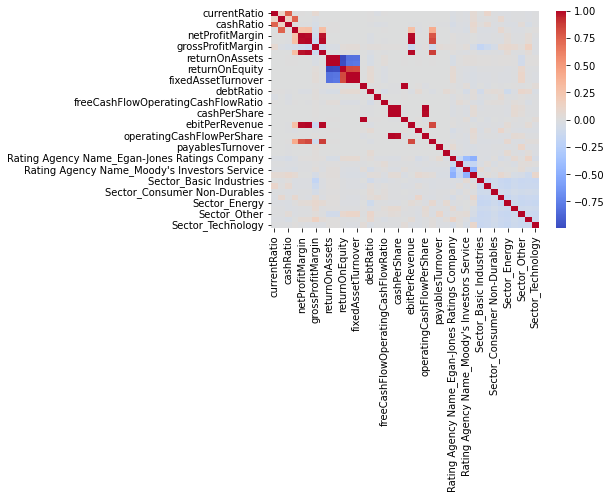

In [26]:
# Correlation matrix
g = sns.heatmap(cleaned_placeholder_df.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")